## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  66.588417  1591.449828  0.341785  5.638500  1.476936
1  74.790644  1161.785767  0.095003  3.647399  0.994185
2  41.734330  1577.385500  0.080261  3.575919  1.092948
3  52.143126  1735.206519  0.626082  3.985998  1.454844
4  36.316118  1134.917251  0.680884  9.081066  1.381352


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.24137 | train_mse: 5.50701 | train_mae: 1.75196 |  0:00:00s
epoch 1  | loss: 1.19145 | train_mse: 4.06365 | train_mae: 1.52593 |  0:00:00s


epoch 2  | loss: 1.28097 | train_mse: 3.725   | train_mae: 1.50514 |  0:00:00s
epoch 3  | loss: 1.16126 | train_mse: 3.10766 | train_mae: 1.38122 |  0:00:00s
epoch 4  | loss: 0.89803 | train_mse: 2.4998  | train_mae: 1.21177 |  0:00:00s


epoch 5  | loss: 0.82269 | train_mse: 2.22889 | train_mae: 1.14481 |  0:00:00s
epoch 6  | loss: 0.82063 | train_mse: 2.05989 | train_mae: 1.10993 |  0:00:00s


epoch 7  | loss: 0.86045 | train_mse: 1.9106  | train_mae: 1.07368 |  0:00:01s
epoch 8  | loss: 0.71041 | train_mse: 1.75869 | train_mae: 1.03484 |  0:00:01s
epoch 9  | loss: 0.71023 | train_mse: 1.60252 | train_mae: 0.99352 |  0:00:01s


epoch 10 | loss: 0.90815 | train_mse: 1.47825 | train_mae: 0.9549  |  0:00:01s
epoch 11 | loss: 0.84337 | train_mse: 1.34596 | train_mae: 0.89742 |  0:00:01s
epoch 12 | loss: 0.71612 | train_mse: 1.24805 | train_mae: 0.84843 |  0:00:01s


epoch 13 | loss: 0.59307 | train_mse: 1.16264 | train_mae: 0.80405 |  0:00:01s
epoch 14 | loss: 0.7263  | train_mse: 1.07821 | train_mae: 0.76801 |  0:00:01s
epoch 15 | loss: 0.57551 | train_mse: 1.00841 | train_mae: 0.74144 |  0:00:01s


epoch 16 | loss: 0.60903 | train_mse: 0.93809 | train_mae: 0.7174  |  0:00:01s
epoch 17 | loss: 0.59297 | train_mse: 0.87269 | train_mae: 0.69537 |  0:00:01s


epoch 18 | loss: 0.62153 | train_mse: 0.81764 | train_mae: 0.67196 |  0:00:02s
epoch 19 | loss: 0.61734 | train_mse: 0.78201 | train_mae: 0.6534  |  0:00:02s
epoch 20 | loss: 0.58068 | train_mse: 0.7494  | train_mae: 0.63578 |  0:00:02s


epoch 21 | loss: 0.55637 | train_mse: 0.73082 | train_mae: 0.6246  |  0:00:02s
epoch 22 | loss: 0.74317 | train_mse: 0.71716 | train_mae: 0.6145  |  0:00:02s
epoch 23 | loss: 0.64985 | train_mse: 0.7004  | train_mae: 0.60586 |  0:00:02s


epoch 24 | loss: 0.51492 | train_mse: 0.68056 | train_mae: 0.59806 |  0:00:02s
epoch 25 | loss: 0.44292 | train_mse: 0.6559  | train_mae: 0.58565 |  0:00:02s
epoch 26 | loss: 0.49872 | train_mse: 0.59856 | train_mae: 0.56597 |  0:00:02s


epoch 27 | loss: 0.59823 | train_mse: 0.56227 | train_mae: 0.54994 |  0:00:02s
epoch 28 | loss: 0.57658 | train_mse: 0.5284  | train_mae: 0.53513 |  0:00:02s
epoch 29 | loss: 0.54815 | train_mse: 0.50071 | train_mae: 0.52181 |  0:00:03s


epoch 30 | loss: 0.59349 | train_mse: 0.48251 | train_mae: 0.51508 |  0:00:03s
epoch 31 | loss: 0.45877 | train_mse: 0.46479 | train_mae: 0.51    |  0:00:03s
epoch 32 | loss: 0.37561 | train_mse: 0.44926 | train_mae: 0.50445 |  0:00:03s


epoch 33 | loss: 0.49951 | train_mse: 0.442   | train_mae: 0.49642 |  0:00:03s
epoch 34 | loss: 0.44014 | train_mse: 0.43801 | train_mae: 0.49182 |  0:00:03s
epoch 35 | loss: 0.3254  | train_mse: 0.4314  | train_mae: 0.48609 |  0:00:03s


epoch 36 | loss: 0.55296 | train_mse: 0.41918 | train_mae: 0.47771 |  0:00:03s
epoch 37 | loss: 0.43112 | train_mse: 0.40332 | train_mae: 0.46993 |  0:00:03s
epoch 38 | loss: 0.41942 | train_mse: 0.39484 | train_mae: 0.46622 |  0:00:03s


epoch 39 | loss: 0.44316 | train_mse: 0.38585 | train_mae: 0.46147 |  0:00:03s
epoch 40 | loss: 0.3072  | train_mse: 0.37208 | train_mae: 0.45148 |  0:00:04s
epoch 41 | loss: 0.53024 | train_mse: 0.35811 | train_mae: 0.44265 |  0:00:04s


epoch 42 | loss: 0.63473 | train_mse: 0.3424  | train_mae: 0.43705 |  0:00:04s
epoch 43 | loss: 0.61397 | train_mse: 0.33491 | train_mae: 0.43446 |  0:00:04s
epoch 44 | loss: 0.53007 | train_mse: 0.32264 | train_mae: 0.42917 |  0:00:04s


epoch 45 | loss: 0.44304 | train_mse: 0.31315 | train_mae: 0.42625 |  0:00:04s
epoch 46 | loss: 0.43925 | train_mse: 0.31033 | train_mae: 0.4279  |  0:00:04s
epoch 47 | loss: 0.43713 | train_mse: 0.32298 | train_mae: 0.43768 |  0:00:04s


epoch 48 | loss: 0.52665 | train_mse: 0.31972 | train_mae: 0.4377  |  0:00:04s
epoch 49 | loss: 0.40131 | train_mse: 0.31227 | train_mae: 0.43106 |  0:00:04s
epoch 50 | loss: 0.49417 | train_mse: 0.31171 | train_mae: 0.42685 |  0:00:04s


epoch 51 | loss: 0.46324 | train_mse: 0.31003 | train_mae: 0.42435 |  0:00:05s
epoch 52 | loss: 0.48936 | train_mse: 0.29496 | train_mae: 0.4121  |  0:00:05s
epoch 53 | loss: 0.37663 | train_mse: 0.29223 | train_mae: 0.40891 |  0:00:05s


epoch 54 | loss: 0.4723  | train_mse: 0.28805 | train_mae: 0.40483 |  0:00:05s
epoch 55 | loss: 0.47602 | train_mse: 0.29009 | train_mae: 0.40294 |  0:00:05s
epoch 56 | loss: 0.34543 | train_mse: 0.29119 | train_mae: 0.40055 |  0:00:05s


epoch 57 | loss: 0.4269  | train_mse: 0.29092 | train_mae: 0.40088 |  0:00:05s
epoch 58 | loss: 0.51417 | train_mse: 0.279   | train_mae: 0.39517 |  0:00:05s
epoch 59 | loss: 0.42588 | train_mse: 0.27246 | train_mae: 0.39264 |  0:00:05s


epoch 60 | loss: 0.3805  | train_mse: 0.2698  | train_mae: 0.39037 |  0:00:05s
epoch 61 | loss: 0.38683 | train_mse: 0.2646  | train_mae: 0.38714 |  0:00:05s
epoch 62 | loss: 0.29013 | train_mse: 0.25676 | train_mae: 0.38401 |  0:00:06s


epoch 63 | loss: 0.31833 | train_mse: 0.25131 | train_mae: 0.38323 |  0:00:06s
epoch 64 | loss: 0.36653 | train_mse: 0.24977 | train_mae: 0.38512 |  0:00:06s
epoch 65 | loss: 0.55317 | train_mse: 0.24854 | train_mae: 0.38562 |  0:00:06s


epoch 66 | loss: 0.25911 | train_mse: 0.24447 | train_mae: 0.37913 |  0:00:06s
epoch 67 | loss: 0.29533 | train_mse: 0.2413  | train_mae: 0.37489 |  0:00:06s
epoch 68 | loss: 0.50828 | train_mse: 0.23585 | train_mae: 0.36974 |  0:00:06s


epoch 69 | loss: 0.478   | train_mse: 0.22595 | train_mae: 0.36142 |  0:00:06s
epoch 70 | loss: 0.33046 | train_mse: 0.21911 | train_mae: 0.35587 |  0:00:06s
epoch 71 | loss: 0.39839 | train_mse: 0.21633 | train_mae: 0.35117 |  0:00:06s


epoch 72 | loss: 0.40281 | train_mse: 0.21062 | train_mae: 0.34593 |  0:00:06s
epoch 73 | loss: 0.40864 | train_mse: 0.20262 | train_mae: 0.33807 |  0:00:06s
epoch 74 | loss: 0.39169 | train_mse: 0.19811 | train_mae: 0.3283  |  0:00:07s


epoch 75 | loss: 0.34259 | train_mse: 0.19485 | train_mae: 0.32268 |  0:00:07s
epoch 76 | loss: 0.45858 | train_mse: 0.19682 | train_mae: 0.3243  |  0:00:07s
epoch 77 | loss: 0.39688 | train_mse: 0.19617 | train_mae: 0.3278  |  0:00:07s


epoch 78 | loss: 0.28386 | train_mse: 0.19607 | train_mae: 0.32818 |  0:00:07s
epoch 79 | loss: 0.35434 | train_mse: 0.19585 | train_mae: 0.32855 |  0:00:07s
epoch 80 | loss: 0.24602 | train_mse: 0.19781 | train_mae: 0.33175 |  0:00:07s


epoch 81 | loss: 0.32682 | train_mse: 0.19672 | train_mae: 0.33451 |  0:00:07s
epoch 82 | loss: 0.38491 | train_mse: 0.19357 | train_mae: 0.33078 |  0:00:07s


epoch 83 | loss: 0.28923 | train_mse: 0.19223 | train_mae: 0.32783 |  0:00:07s
epoch 84 | loss: 0.29157 | train_mse: 0.19394 | train_mae: 0.32524 |  0:00:07s
epoch 85 | loss: 0.26692 | train_mse: 0.19636 | train_mae: 0.32537 |  0:00:08s


epoch 86 | loss: 0.29299 | train_mse: 0.20288 | train_mae: 0.33159 |  0:00:08s
epoch 87 | loss: 0.38156 | train_mse: 0.20295 | train_mae: 0.3337  |  0:00:08s
epoch 88 | loss: 0.22677 | train_mse: 0.2059  | train_mae: 0.33401 |  0:00:08s


epoch 89 | loss: 0.2786  | train_mse: 0.2067  | train_mae: 0.33593 |  0:00:08s
epoch 90 | loss: 0.37413 | train_mse: 0.20403 | train_mae: 0.33732 |  0:00:08s
epoch 91 | loss: 0.3212  | train_mse: 0.21025 | train_mae: 0.34206 |  0:00:08s


epoch 92 | loss: 0.2591  | train_mse: 0.20838 | train_mae: 0.34075 |  0:00:08s
epoch 93 | loss: 0.44534 | train_mse: 0.20368 | train_mae: 0.33658 |  0:00:08s
epoch 94 | loss: 0.25914 | train_mse: 0.20155 | train_mae: 0.33335 |  0:00:08s


epoch 95 | loss: 0.28318 | train_mse: 0.20324 | train_mae: 0.33469 |  0:00:08s
epoch 96 | loss: 0.34357 | train_mse: 0.20178 | train_mae: 0.33336 |  0:00:09s
epoch 97 | loss: 0.32539 | train_mse: 0.20147 | train_mae: 0.33365 |  0:00:09s


epoch 98 | loss: 0.3608  | train_mse: 0.20576 | train_mae: 0.33951 |  0:00:09s
epoch 99 | loss: 0.24901 | train_mse: 0.20444 | train_mae: 0.33853 |  0:00:09s
epoch 100| loss: 0.26679 | train_mse: 0.1986  | train_mae: 0.33569 |  0:00:09s


epoch 101| loss: 0.34545 | train_mse: 0.22577 | train_mae: 0.34497 |  0:00:09s
epoch 102| loss: 0.25677 | train_mse: 0.23244 | train_mae: 0.34574 |  0:00:09s
epoch 103| loss: 0.33181 | train_mse: 0.22259 | train_mae: 0.34423 |  0:00:09s


epoch 104| loss: 0.22703 | train_mse: 0.21461 | train_mae: 0.34134 |  0:00:09s
epoch 105| loss: 0.33771 | train_mse: 0.20407 | train_mae: 0.33503 |  0:00:09s


epoch 106| loss: 0.28404 | train_mse: 0.20126 | train_mae: 0.33199 |  0:00:09s
epoch 107| loss: 0.25097 | train_mse: 0.19111 | train_mae: 0.32546 |  0:00:10s
epoch 108| loss: 0.27444 | train_mse: 0.18178 | train_mae: 0.3249  |  0:00:10s


epoch 109| loss: 0.22822 | train_mse: 0.17147 | train_mae: 0.31805 |  0:00:10s
epoch 110| loss: 0.2645  | train_mse: 0.16874 | train_mae: 0.31519 |  0:00:10s
epoch 111| loss: 0.2333  | train_mse: 0.16993 | train_mae: 0.31348 |  0:00:10s


epoch 112| loss: 0.30706 | train_mse: 0.16783 | train_mae: 0.31058 |  0:00:10s
epoch 113| loss: 0.29682 | train_mse: 0.1669  | train_mae: 0.30895 |  0:00:10s
epoch 114| loss: 0.28839 | train_mse: 0.16505 | train_mae: 0.30869 |  0:00:10s


epoch 115| loss: 0.19715 | train_mse: 0.16266 | train_mae: 0.30949 |  0:00:10s
epoch 116| loss: 0.25037 | train_mse: 0.16155 | train_mae: 0.30837 |  0:00:10s
epoch 117| loss: 0.17062 | train_mse: 0.1502  | train_mae: 0.29857 |  0:00:10s


epoch 118| loss: 0.23336 | train_mse: 0.14444 | train_mae: 0.28985 |  0:00:11s
epoch 119| loss: 0.25252 | train_mse: 0.14203 | train_mae: 0.28774 |  0:00:11s
epoch 120| loss: 0.20947 | train_mse: 0.1446  | train_mae: 0.28867 |  0:00:11s


epoch 121| loss: 0.27753 | train_mse: 0.14588 | train_mae: 0.29279 |  0:00:11s
epoch 122| loss: 0.35668 | train_mse: 0.14668 | train_mae: 0.29502 |  0:00:11s
epoch 123| loss: 0.2921  | train_mse: 0.15091 | train_mae: 0.2964  |  0:00:11s


epoch 124| loss: 0.41411 | train_mse: 0.15261 | train_mae: 0.29213 |  0:00:11s
epoch 125| loss: 0.26485 | train_mse: 0.15479 | train_mae: 0.29049 |  0:00:11s
epoch 126| loss: 0.22374 | train_mse: 0.15444 | train_mae: 0.28563 |  0:00:11s


epoch 127| loss: 0.23596 | train_mse: 0.16074 | train_mae: 0.28619 |  0:00:11s
epoch 128| loss: 0.17296 | train_mse: 0.16197 | train_mae: 0.28747 |  0:00:11s
epoch 129| loss: 0.28912 | train_mse: 0.15812 | train_mae: 0.28499 |  0:00:11s


epoch 130| loss: 0.20048 | train_mse: 0.15711 | train_mae: 0.28872 |  0:00:12s
epoch 131| loss: 0.16562 | train_mse: 0.15542 | train_mae: 0.28929 |  0:00:12s
epoch 132| loss: 0.19497 | train_mse: 0.15363 | train_mae: 0.29247 |  0:00:12s


epoch 133| loss: 0.26388 | train_mse: 0.14653 | train_mae: 0.28726 |  0:00:12s
epoch 134| loss: 0.30186 | train_mse: 0.1407  | train_mae: 0.28348 |  0:00:12s
epoch 135| loss: 0.23334 | train_mse: 0.13438 | train_mae: 0.27705 |  0:00:12s


epoch 136| loss: 0.16771 | train_mse: 0.12977 | train_mae: 0.27262 |  0:00:12s
epoch 137| loss: 0.14696 | train_mse: 0.12568 | train_mae: 0.26967 |  0:00:12s
epoch 138| loss: 0.31724 | train_mse: 0.12256 | train_mae: 0.26786 |  0:00:12s


epoch 139| loss: 0.36051 | train_mse: 0.12039 | train_mae: 0.26642 |  0:00:12s
epoch 140| loss: 0.211   | train_mse: 0.11892 | train_mae: 0.26471 |  0:00:12s


epoch 141| loss: 0.1569  | train_mse: 0.12093 | train_mae: 0.2665  |  0:00:13s
epoch 142| loss: 0.24555 | train_mse: 0.12001 | train_mae: 0.26854 |  0:00:13s
epoch 143| loss: 0.22301 | train_mse: 0.12007 | train_mae: 0.27152 |  0:00:13s


epoch 144| loss: 0.23447 | train_mse: 0.11885 | train_mae: 0.27214 |  0:00:13s
epoch 145| loss: 0.48659 | train_mse: 0.11606 | train_mae: 0.27209 |  0:00:13s
epoch 146| loss: 0.24413 | train_mse: 0.11471 | train_mae: 0.27081 |  0:00:13s


epoch 147| loss: 0.15272 | train_mse: 0.11129 | train_mae: 0.26638 |  0:00:13s
epoch 148| loss: 0.1907  | train_mse: 0.10851 | train_mae: 0.26018 |  0:00:13s
epoch 149| loss: 0.24024 | train_mse: 0.10762 | train_mae: 0.25627 |  0:00:13s


epoch 150| loss: 0.34392 | train_mse: 0.10709 | train_mae: 0.25517 |  0:00:13s
epoch 151| loss: 0.25301 | train_mse: 0.11025 | train_mae: 0.2574  |  0:00:13s
epoch 152| loss: 0.18014 | train_mse: 0.10983 | train_mae: 0.25665 |  0:00:14s


epoch 153| loss: 0.16234 | train_mse: 0.10849 | train_mae: 0.25449 |  0:00:14s
epoch 154| loss: 0.11355 | train_mse: 0.11132 | train_mae: 0.2558  |  0:00:14s
epoch 155| loss: 0.16548 | train_mse: 0.11635 | train_mae: 0.25746 |  0:00:14s


epoch 156| loss: 0.3205  | train_mse: 0.11409 | train_mae: 0.25606 |  0:00:14s
epoch 157| loss: 0.27056 | train_mse: 0.10835 | train_mae: 0.25268 |  0:00:14s
epoch 158| loss: 0.23865 | train_mse: 0.1025  | train_mae: 0.24936 |  0:00:14s


epoch 159| loss: 0.25912 | train_mse: 0.09636 | train_mae: 0.24598 |  0:00:14s
epoch 160| loss: 0.17222 | train_mse: 0.09467 | train_mae: 0.24537 |  0:00:14s
epoch 161| loss: 0.23801 | train_mse: 0.09478 | train_mae: 0.24826 |  0:00:14s


epoch 162| loss: 0.20346 | train_mse: 0.09617 | train_mae: 0.25014 |  0:00:14s
epoch 163| loss: 0.27458 | train_mse: 0.09531 | train_mae: 0.24985 |  0:00:15s
epoch 164| loss: 0.38822 | train_mse: 0.09267 | train_mae: 0.2448  |  0:00:15s


epoch 165| loss: 0.21674 | train_mse: 0.0904  | train_mae: 0.24026 |  0:00:15s
epoch 166| loss: 0.16516 | train_mse: 0.09016 | train_mae: 0.23889 |  0:00:15s
epoch 167| loss: 0.2921  | train_mse: 0.08902 | train_mae: 0.23871 |  0:00:15s


epoch 168| loss: 0.14419 | train_mse: 0.08633 | train_mae: 0.23262 |  0:00:15s
epoch 169| loss: 0.15816 | train_mse: 0.085   | train_mae: 0.23069 |  0:00:15s
epoch 170| loss: 0.24649 | train_mse: 0.08356 | train_mae: 0.22974 |  0:00:15s


epoch 171| loss: 0.11728 | train_mse: 0.08274 | train_mae: 0.22694 |  0:00:15s
epoch 172| loss: 0.16067 | train_mse: 0.08534 | train_mae: 0.23306 |  0:00:15s


epoch 173| loss: 0.21983 | train_mse: 0.08754 | train_mae: 0.23474 |  0:00:15s
epoch 174| loss: 0.14571 | train_mse: 0.08962 | train_mae: 0.23705 |  0:00:16s
epoch 175| loss: 0.20189 | train_mse: 0.09054 | train_mae: 0.23701 |  0:00:16s


epoch 176| loss: 0.14717 | train_mse: 0.09058 | train_mae: 0.23593 |  0:00:16s


epoch 177| loss: 0.23832 | train_mse: 0.09142 | train_mae: 0.23656 |  0:00:16s


epoch 178| loss: 0.18049 | train_mse: 0.09186 | train_mae: 0.237   |  0:00:17s


epoch 179| loss: 0.13327 | train_mse: 0.08945 | train_mae: 0.23542 |  0:00:17s
epoch 180| loss: 0.21996 | train_mse: 0.08884 | train_mae: 0.23518 |  0:00:17s


epoch 181| loss: 0.13404 | train_mse: 0.08788 | train_mae: 0.23472 |  0:00:18s
epoch 182| loss: 0.22094 | train_mse: 0.08693 | train_mae: 0.23295 |  0:00:18s


epoch 183| loss: 0.19308 | train_mse: 0.08748 | train_mae: 0.23382 |  0:00:18s
epoch 184| loss: 0.21321 | train_mse: 0.08984 | train_mae: 0.23725 |  0:00:18s
epoch 185| loss: 0.17053 | train_mse: 0.09438 | train_mae: 0.24155 |  0:00:18s


epoch 186| loss: 0.15159 | train_mse: 0.09778 | train_mae: 0.2444  |  0:00:18s
epoch 187| loss: 0.12926 | train_mse: 0.09698 | train_mae: 0.24382 |  0:00:18s
epoch 188| loss: 0.2207  | train_mse: 0.0942  | train_mae: 0.24064 |  0:00:18s


epoch 189| loss: 0.22333 | train_mse: 0.0887  | train_mae: 0.23484 |  0:00:18s
epoch 190| loss: 0.13032 | train_mse: 0.08761 | train_mae: 0.23446 |  0:00:18s


epoch 191| loss: 0.18891 | train_mse: 0.08566 | train_mae: 0.23101 |  0:00:18s
epoch 192| loss: 0.19617 | train_mse: 0.08521 | train_mae: 0.23014 |  0:00:19s
epoch 193| loss: 0.15525 | train_mse: 0.08576 | train_mae: 0.23153 |  0:00:19s


epoch 194| loss: 0.14592 | train_mse: 0.08629 | train_mae: 0.2317  |  0:00:19s
epoch 195| loss: 0.22412 | train_mse: 0.08626 | train_mae: 0.22901 |  0:00:19s
epoch 196| loss: 0.17381 | train_mse: 0.08769 | train_mae: 0.23146 |  0:00:19s


epoch 197| loss: 0.20072 | train_mse: 0.08827 | train_mae: 0.23365 |  0:00:19s
epoch 198| loss: 0.15167 | train_mse: 0.08887 | train_mae: 0.23354 |  0:00:19s
epoch 199| loss: 0.18033 | train_mse: 0.08787 | train_mae: 0.23125 |  0:00:19s


epoch 200| loss: 0.10809 | train_mse: 0.08521 | train_mae: 0.22941 |  0:00:19s
epoch 201| loss: 0.12532 | train_mse: 0.08159 | train_mae: 0.22296 |  0:00:19s


epoch 202| loss: 0.19604 | train_mse: 0.08305 | train_mae: 0.22399 |  0:00:19s
epoch 203| loss: 0.10363 | train_mse: 0.08102 | train_mae: 0.22153 |  0:00:20s
epoch 204| loss: 0.20027 | train_mse: 0.08505 | train_mae: 0.22482 |  0:00:20s


epoch 205| loss: 0.15416 | train_mse: 0.09831 | train_mae: 0.23501 |  0:00:20s
epoch 206| loss: 0.23529 | train_mse: 0.11338 | train_mae: 0.24551 |  0:00:20s
epoch 207| loss: 0.14316 | train_mse: 0.11331 | train_mae: 0.24779 |  0:00:20s


epoch 208| loss: 0.21126 | train_mse: 0.10563 | train_mae: 0.2435  |  0:00:20s
epoch 209| loss: 0.20742 | train_mse: 0.10249 | train_mae: 0.23948 |  0:00:20s
epoch 210| loss: 0.11629 | train_mse: 0.09648 | train_mae: 0.23512 |  0:00:20s


epoch 211| loss: 0.1589  | train_mse: 0.08852 | train_mae: 0.22992 |  0:00:20s
epoch 212| loss: 0.14095 | train_mse: 0.08867 | train_mae: 0.22962 |  0:00:20s
epoch 213| loss: 0.16136 | train_mse: 0.08474 | train_mae: 0.22741 |  0:00:20s


epoch 214| loss: 0.27381 | train_mse: 0.08186 | train_mae: 0.22421 |  0:00:21s
epoch 215| loss: 0.14284 | train_mse: 0.08313 | train_mae: 0.2275  |  0:00:21s
epoch 216| loss: 0.16955 | train_mse: 0.08173 | train_mae: 0.22733 |  0:00:21s


epoch 217| loss: 0.29976 | train_mse: 0.08605 | train_mae: 0.23254 |  0:00:21s
epoch 218| loss: 0.11552 | train_mse: 0.08687 | train_mae: 0.23323 |  0:00:21s
epoch 219| loss: 0.19743 | train_mse: 0.0857  | train_mae: 0.23171 |  0:00:21s


epoch 220| loss: 0.14117 | train_mse: 0.08448 | train_mae: 0.22994 |  0:00:21s
epoch 221| loss: 0.13277 | train_mse: 0.08212 | train_mae: 0.22699 |  0:00:21s
epoch 222| loss: 0.15522 | train_mse: 0.08027 | train_mae: 0.22418 |  0:00:21s


epoch 223| loss: 0.33225 | train_mse: 0.07843 | train_mae: 0.221   |  0:00:21s
epoch 224| loss: 0.25711 | train_mse: 0.07696 | train_mae: 0.21966 |  0:00:21s
epoch 225| loss: 0.18078 | train_mse: 0.07266 | train_mae: 0.21359 |  0:00:21s


epoch 226| loss: 0.13981 | train_mse: 0.07351 | train_mae: 0.21322 |  0:00:22s
epoch 227| loss: 0.09628 | train_mse: 0.07319 | train_mae: 0.21161 |  0:00:22s
epoch 228| loss: 0.29411 | train_mse: 0.07481 | train_mae: 0.21262 |  0:00:22s


epoch 229| loss: 0.15344 | train_mse: 0.07729 | train_mae: 0.21502 |  0:00:22s
epoch 230| loss: 0.1609  | train_mse: 0.07765 | train_mae: 0.21649 |  0:00:22s
epoch 231| loss: 0.10588 | train_mse: 0.07632 | train_mae: 0.21387 |  0:00:22s


epoch 232| loss: 0.124   | train_mse: 0.07774 | train_mae: 0.21547 |  0:00:22s
epoch 233| loss: 0.13667 | train_mse: 0.07905 | train_mae: 0.2173  |  0:00:22s
epoch 234| loss: 0.13873 | train_mse: 0.08035 | train_mae: 0.21798 |  0:00:22s


epoch 235| loss: 0.17124 | train_mse: 0.0784  | train_mae: 0.21497 |  0:00:22s
epoch 236| loss: 0.12355 | train_mse: 0.08032 | train_mae: 0.2156  |  0:00:22s
epoch 237| loss: 0.1117  | train_mse: 0.07712 | train_mae: 0.21055 |  0:00:23s


epoch 238| loss: 0.11337 | train_mse: 0.07557 | train_mae: 0.20906 |  0:00:23s
epoch 239| loss: 0.15658 | train_mse: 0.07434 | train_mae: 0.20735 |  0:00:23s
epoch 240| loss: 0.12609 | train_mse: 0.07478 | train_mae: 0.20979 |  0:00:23s


epoch 241| loss: 0.26954 | train_mse: 0.06984 | train_mae: 0.20402 |  0:00:23s
epoch 242| loss: 0.14859 | train_mse: 0.06776 | train_mae: 0.20362 |  0:00:23s
epoch 243| loss: 0.09856 | train_mse: 0.06771 | train_mae: 0.20509 |  0:00:23s


epoch 244| loss: 0.17329 | train_mse: 0.06894 | train_mae: 0.20786 |  0:00:23s
epoch 245| loss: 0.10973 | train_mse: 0.07109 | train_mae: 0.21205 |  0:00:23s
epoch 246| loss: 0.08881 | train_mse: 0.07122 | train_mae: 0.21406 |  0:00:23s


epoch 247| loss: 0.14397 | train_mse: 0.06958 | train_mae: 0.21316 |  0:00:23s
epoch 248| loss: 0.09147 | train_mse: 0.07089 | train_mae: 0.21478 |  0:00:24s
epoch 249| loss: 0.12777 | train_mse: 0.07391 | train_mae: 0.21778 |  0:00:24s


epoch 250| loss: 0.19674 | train_mse: 0.07636 | train_mae: 0.21966 |  0:00:24s
epoch 251| loss: 0.24708 | train_mse: 0.07214 | train_mae: 0.21048 |  0:00:24s
epoch 252| loss: 0.26177 | train_mse: 0.07501 | train_mae: 0.21081 |  0:00:24s


epoch 253| loss: 0.13341 | train_mse: 0.07613 | train_mae: 0.20939 |  0:00:24s
epoch 254| loss: 0.14227 | train_mse: 0.07581 | train_mae: 0.20963 |  0:00:24s
epoch 255| loss: 0.14019 | train_mse: 0.07307 | train_mae: 0.20749 |  0:00:24s


epoch 256| loss: 0.24317 | train_mse: 0.06835 | train_mae: 0.20293 |  0:00:24s
epoch 257| loss: 0.10614 | train_mse: 0.06492 | train_mae: 0.19897 |  0:00:24s


epoch 258| loss: 0.08709 | train_mse: 0.07017 | train_mae: 0.20237 |  0:00:24s
epoch 259| loss: 0.22483 | train_mse: 0.07925 | train_mae: 0.20778 |  0:00:24s
epoch 260| loss: 0.13175 | train_mse: 0.09208 | train_mae: 0.21259 |  0:00:25s


epoch 261| loss: 0.10237 | train_mse: 0.09808 | train_mae: 0.21735 |  0:00:25s
epoch 262| loss: 0.29381 | train_mse: 0.09459 | train_mae: 0.21679 |  0:00:25s
epoch 263| loss: 0.14698 | train_mse: 0.09994 | train_mae: 0.2215  |  0:00:25s


epoch 264| loss: 0.09428 | train_mse: 0.09171 | train_mae: 0.22098 |  0:00:25s
epoch 265| loss: 0.08135 | train_mse: 0.07812 | train_mae: 0.21502 |  0:00:25s
epoch 266| loss: 0.10913 | train_mse: 0.06636 | train_mae: 0.20757 |  0:00:25s


epoch 267| loss: 0.107   | train_mse: 0.0613  | train_mae: 0.20164 |  0:00:25s
epoch 268| loss: 0.11286 | train_mse: 0.0603  | train_mae: 0.19736 |  0:00:25s
epoch 269| loss: 0.14824 | train_mse: 0.05826 | train_mae: 0.19148 |  0:00:25s


epoch 270| loss: 0.17303 | train_mse: 0.05919 | train_mae: 0.19176 |  0:00:25s
epoch 271| loss: 0.19169 | train_mse: 0.05852 | train_mae: 0.18954 |  0:00:25s
epoch 272| loss: 0.2012  | train_mse: 0.06313 | train_mae: 0.19729 |  0:00:26s


epoch 273| loss: 0.1731  | train_mse: 0.06967 | train_mae: 0.20572 |  0:00:26s
epoch 274| loss: 0.12736 | train_mse: 0.07332 | train_mae: 0.209   |  0:00:26s
epoch 275| loss: 0.13143 | train_mse: 0.07674 | train_mae: 0.21138 |  0:00:26s


epoch 276| loss: 0.33733 | train_mse: 0.07706 | train_mae: 0.21151 |  0:00:26s
epoch 277| loss: 0.25533 | train_mse: 0.07444 | train_mae: 0.20831 |  0:00:26s
epoch 278| loss: 0.18283 | train_mse: 0.07665 | train_mae: 0.20996 |  0:00:26s


epoch 279| loss: 0.12803 | train_mse: 0.07551 | train_mae: 0.20948 |  0:00:26s
epoch 280| loss: 0.14266 | train_mse: 0.07202 | train_mae: 0.20654 |  0:00:26s


epoch 281| loss: 0.09328 | train_mse: 0.07046 | train_mae: 0.20394 |  0:00:26s
epoch 282| loss: 0.14127 | train_mse: 0.06877 | train_mae: 0.20294 |  0:00:26s
epoch 283| loss: 0.231   | train_mse: 0.06552 | train_mae: 0.20023 |  0:00:27s


epoch 284| loss: 0.21664 | train_mse: 0.06483 | train_mae: 0.19891 |  0:00:27s
epoch 285| loss: 0.10985 | train_mse: 0.0642  | train_mae: 0.19777 |  0:00:27s
epoch 286| loss: 0.15555 | train_mse: 0.06307 | train_mae: 0.19555 |  0:00:27s


epoch 287| loss: 0.28696 | train_mse: 0.06242 | train_mae: 0.19417 |  0:00:27s
epoch 288| loss: 0.22998 | train_mse: 0.06098 | train_mae: 0.1925  |  0:00:27s
epoch 289| loss: 0.17857 | train_mse: 0.06024 | train_mae: 0.19144 |  0:00:27s


epoch 290| loss: 0.12482 | train_mse: 0.05943 | train_mae: 0.18785 |  0:00:27s
epoch 291| loss: 0.06487 | train_mse: 0.05957 | train_mae: 0.19053 |  0:00:27s


epoch 292| loss: 0.09424 | train_mse: 0.06022 | train_mae: 0.19105 |  0:00:27s
epoch 293| loss: 0.1082  | train_mse: 0.0584  | train_mae: 0.18833 |  0:00:27s
epoch 294| loss: 0.08337 | train_mse: 0.05657 | train_mae: 0.18638 |  0:00:28s


epoch 295| loss: 0.20967 | train_mse: 0.05539 | train_mae: 0.18628 |  0:00:28s
epoch 296| loss: 0.11426 | train_mse: 0.05582 | train_mae: 0.1878  |  0:00:28s
epoch 297| loss: 0.3588  | train_mse: 0.05283 | train_mae: 0.18419 |  0:00:28s


epoch 298| loss: 0.21819 | train_mse: 0.05198 | train_mae: 0.18312 |  0:00:28s
epoch 299| loss: 0.08163 | train_mse: 0.05201 | train_mae: 0.18234 |  0:00:28s
epoch 300| loss: 0.07578 | train_mse: 0.05237 | train_mae: 0.1831  |  0:00:28s


epoch 301| loss: 0.15235 | train_mse: 0.05132 | train_mae: 0.18175 |  0:00:28s
epoch 302| loss: 0.07485 | train_mse: 0.05129 | train_mae: 0.17958 |  0:00:28s


epoch 303| loss: 0.09388 | train_mse: 0.0591  | train_mae: 0.1871  |  0:00:28s
epoch 304| loss: 0.07512 | train_mse: 0.06869 | train_mae: 0.19598 |  0:00:28s
epoch 305| loss: 0.12131 | train_mse: 0.07987 | train_mae: 0.20357 |  0:00:29s


epoch 306| loss: 0.11742 | train_mse: 0.08659 | train_mae: 0.20769 |  0:00:29s
epoch 307| loss: 0.10967 | train_mse: 0.08266 | train_mae: 0.20407 |  0:00:29s
epoch 308| loss: 0.17688 | train_mse: 0.06356 | train_mae: 0.19044 |  0:00:29s


epoch 309| loss: 0.19274 | train_mse: 0.05151 | train_mae: 0.1798  |  0:00:29s
epoch 310| loss: 0.13574 | train_mse: 0.04726 | train_mae: 0.17387 |  0:00:29s
epoch 311| loss: 0.17661 | train_mse: 0.04829 | train_mae: 0.17391 |  0:00:29s


epoch 312| loss: 0.08186 | train_mse: 0.05542 | train_mae: 0.18103 |  0:00:29s
epoch 313| loss: 0.09763 | train_mse: 0.06465 | train_mae: 0.18718 |  0:00:29s
epoch 314| loss: 0.18346 | train_mse: 0.06885 | train_mae: 0.18991 |  0:00:29s


epoch 315| loss: 0.16182 | train_mse: 0.06227 | train_mae: 0.18864 |  0:00:29s
epoch 316| loss: 0.08982 | train_mse: 0.06163 | train_mae: 0.18839 |  0:00:30s
epoch 317| loss: 0.11427 | train_mse: 0.06875 | train_mae: 0.19517 |  0:00:30s


epoch 318| loss: 0.20388 | train_mse: 0.06981 | train_mae: 0.19659 |  0:00:30s
epoch 319| loss: 0.17811 | train_mse: 0.0717  | train_mae: 0.19935 |  0:00:30s
epoch 320| loss: 0.12329 | train_mse: 0.07069 | train_mae: 0.19817 |  0:00:30s


epoch 321| loss: 0.13276 | train_mse: 0.06057 | train_mae: 0.18985 |  0:00:30s
epoch 322| loss: 0.10019 | train_mse: 0.05495 | train_mae: 0.1805  |  0:00:30s
epoch 323| loss: 0.12337 | train_mse: 0.05797 | train_mae: 0.18348 |  0:00:30s


epoch 324| loss: 0.09878 | train_mse: 0.06886 | train_mae: 0.18318 |  0:00:30s
epoch 325| loss: 0.1464  | train_mse: 0.0592  | train_mae: 0.1771  |  0:00:30s


epoch 326| loss: 0.25869 | train_mse: 0.05621 | train_mae: 0.17556 |  0:00:30s
epoch 327| loss: 0.14008 | train_mse: 0.05884 | train_mae: 0.17401 |  0:00:31s
epoch 328| loss: 0.12305 | train_mse: 0.06417 | train_mae: 0.17588 |  0:00:31s


epoch 329| loss: 0.17625 | train_mse: 0.04623 | train_mae: 0.16735 |  0:00:31s
epoch 330| loss: 0.08398 | train_mse: 0.04544 | train_mae: 0.16619 |  0:00:31s
epoch 331| loss: 0.09961 | train_mse: 0.04862 | train_mae: 0.17137 |  0:00:31s


epoch 332| loss: 0.10517 | train_mse: 0.05051 | train_mae: 0.17454 |  0:00:31s
epoch 333| loss: 0.09549 | train_mse: 0.05239 | train_mae: 0.17689 |  0:00:31s
epoch 334| loss: 0.13453 | train_mse: 0.05212 | train_mae: 0.17696 |  0:00:31s


epoch 335| loss: 0.14972 | train_mse: 0.05311 | train_mae: 0.17947 |  0:00:31s
epoch 336| loss: 0.15251 | train_mse: 0.05344 | train_mae: 0.18068 |  0:00:31s
epoch 337| loss: 0.14375 | train_mse: 0.05268 | train_mae: 0.17964 |  0:00:31s


epoch 338| loss: 0.26191 | train_mse: 0.05156 | train_mae: 0.1787  |  0:00:31s
epoch 339| loss: 0.12824 | train_mse: 0.05179 | train_mae: 0.17916 |  0:00:32s
epoch 340| loss: 0.06859 | train_mse: 0.05092 | train_mae: 0.17745 |  0:00:32s


epoch 341| loss: 0.11256 | train_mse: 0.04894 | train_mae: 0.17453 |  0:00:32s
epoch 342| loss: 0.11016 | train_mse: 0.04813 | train_mae: 0.17235 |  0:00:32s
epoch 343| loss: 0.05216 | train_mse: 0.04785 | train_mae: 0.16995 |  0:00:32s


epoch 344| loss: 0.14199 | train_mse: 0.04852 | train_mae: 0.1703  |  0:00:32s
epoch 345| loss: 0.09506 | train_mse: 0.04734 | train_mae: 0.1701  |  0:00:32s
epoch 346| loss: 0.16393 | train_mse: 0.04644 | train_mae: 0.16938 |  0:00:32s


epoch 347| loss: 0.11146 | train_mse: 0.04853 | train_mae: 0.17573 |  0:00:32s
epoch 348| loss: 0.0925  | train_mse: 0.06517 | train_mae: 0.18867 |  0:00:32s
epoch 349| loss: 0.10358 | train_mse: 0.06628 | train_mae: 0.1911  |  0:00:32s


epoch 350| loss: 0.10751 | train_mse: 0.05343 | train_mae: 0.18803 |  0:00:32s
epoch 351| loss: 0.09348 | train_mse: 0.05048 | train_mae: 0.18603 |  0:00:33s
epoch 352| loss: 0.17502 | train_mse: 0.04849 | train_mae: 0.18419 |  0:00:33s


epoch 353| loss: 0.09989 | train_mse: 0.049   | train_mae: 0.18484 |  0:00:33s
epoch 354| loss: 0.14952 | train_mse: 0.04857 | train_mae: 0.18297 |  0:00:33s
epoch 355| loss: 0.08529 | train_mse: 0.04931 | train_mae: 0.18425 |  0:00:33s


epoch 356| loss: 0.16013 | train_mse: 0.05162 | train_mae: 0.18604 |  0:00:33s
epoch 357| loss: 0.12012 | train_mse: 0.05271 | train_mae: 0.18743 |  0:00:33s
epoch 358| loss: 0.0907  | train_mse: 0.05531 | train_mae: 0.19094 |  0:00:33s


epoch 359| loss: 0.19022 | train_mse: 0.05223 | train_mae: 0.18818 |  0:00:33s
epoch 360| loss: 0.10746 | train_mse: 0.0574  | train_mae: 0.19072 |  0:00:33s
epoch 361| loss: 0.17228 | train_mse: 0.06445 | train_mae: 0.19166 |  0:00:33s


epoch 362| loss: 0.09745 | train_mse: 0.06753 | train_mae: 0.19308 |  0:00:34s
epoch 363| loss: 0.11729 | train_mse: 0.0692  | train_mae: 0.19172 |  0:00:34s
epoch 364| loss: 0.27006 | train_mse: 0.06442 | train_mae: 0.18727 |  0:00:34s


epoch 365| loss: 0.08462 | train_mse: 0.0575  | train_mae: 0.18114 |  0:00:34s
epoch 366| loss: 0.07993 | train_mse: 0.05279 | train_mae: 0.17765 |  0:00:34s
epoch 367| loss: 0.11988 | train_mse: 0.05016 | train_mae: 0.1777  |  0:00:34s


epoch 368| loss: 0.07863 | train_mse: 0.04581 | train_mae: 0.17349 |  0:00:34s
epoch 369| loss: 0.08898 | train_mse: 0.04696 | train_mae: 0.17513 |  0:00:34s
epoch 370| loss: 0.20131 | train_mse: 0.04605 | train_mae: 0.17275 |  0:00:34s


epoch 371| loss: 0.1511  | train_mse: 0.0464  | train_mae: 0.17335 |  0:00:34s
epoch 372| loss: 0.12457 | train_mse: 0.04905 | train_mae: 0.17729 |  0:00:34s


epoch 373| loss: 0.17729 | train_mse: 0.05219 | train_mae: 0.18161 |  0:00:34s
epoch 374| loss: 0.11023 | train_mse: 0.0543  | train_mae: 0.18461 |  0:00:35s
epoch 375| loss: 0.11774 | train_mse: 0.05731 | train_mae: 0.18837 |  0:00:35s


epoch 376| loss: 0.07172 | train_mse: 0.05952 | train_mae: 0.19046 |  0:00:35s
epoch 377| loss: 0.13242 | train_mse: 0.05475 | train_mae: 0.18284 |  0:00:35s
epoch 378| loss: 0.09052 | train_mse: 0.05189 | train_mae: 0.17808 |  0:00:35s


epoch 379| loss: 0.26983 | train_mse: 0.05058 | train_mae: 0.17352 |  0:00:35s
epoch 380| loss: 0.06818 | train_mse: 0.05893 | train_mae: 0.17944 |  0:00:35s

Early stopping occurred at epoch 380 with best_epoch = 330 and best_train_mae = 0.16619
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.3567768771012406


ABC Pre-generator MAE 0.9006324155105394


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

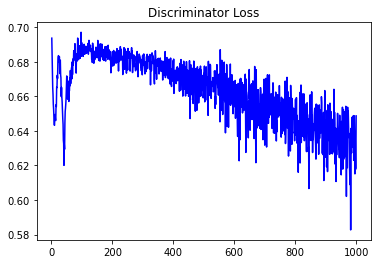

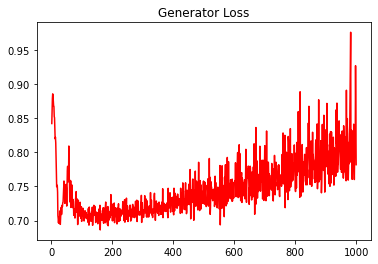

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.34191558917984366


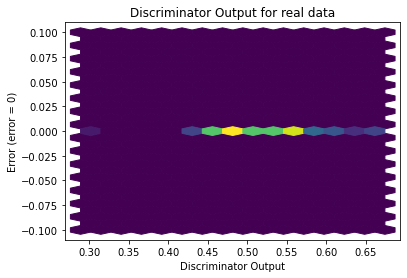

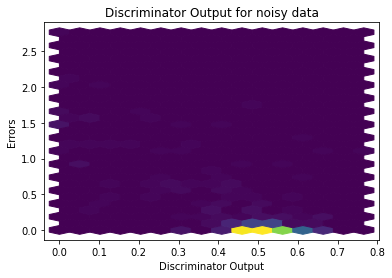

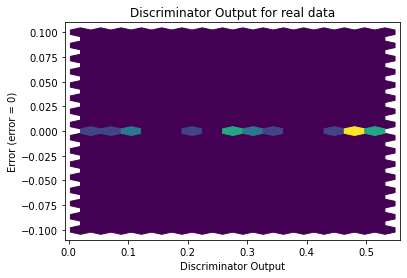

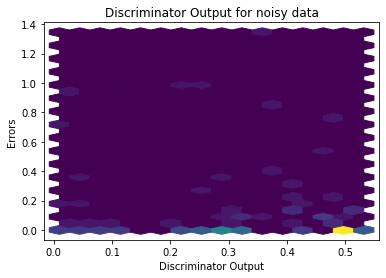

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


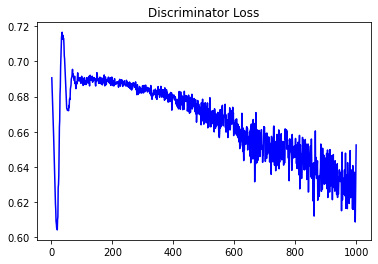

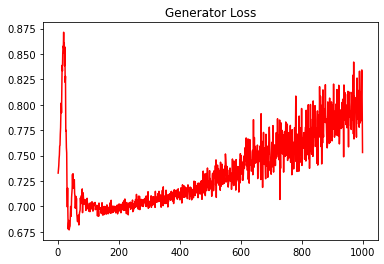

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.50681509514153


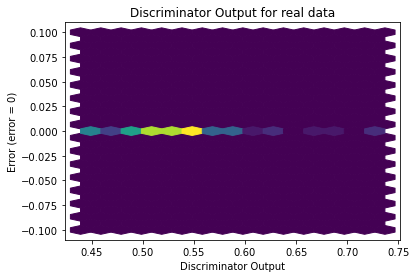

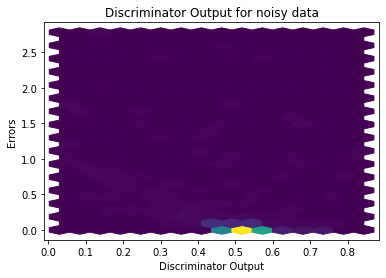

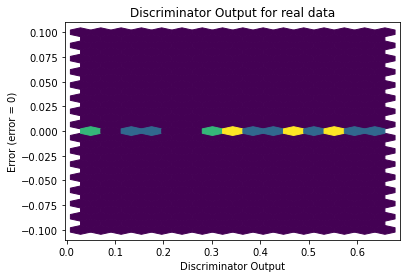

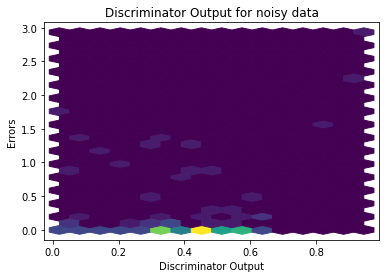

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1671]], requires_grad=True)
